<a href="https://colab.research.google.com/github/shyam1444/Image_Processing_Project/blob/main/Image_Processing_Model_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_train_path = '/content/drive/MyDrive/Img_Processing-G-Solutions.v2i.folder/train'
data_test_path = '/content/drive/MyDrive/Img_Processing-G-Solutions.v2i.folder/test'
data_val_path = '/content/drive/MyDrive/Img_Processing-G-Solutions.v2i.folder/test'

In [ ]:
img_width = 180
img_height = 180

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1559 files belonging to 29 classes.


In [ ]:
data_cat = data_train.class_names

In [ ]:
data_cat

['Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 168 files belonging to 29 classes.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 168 files belonging to 29 classes.


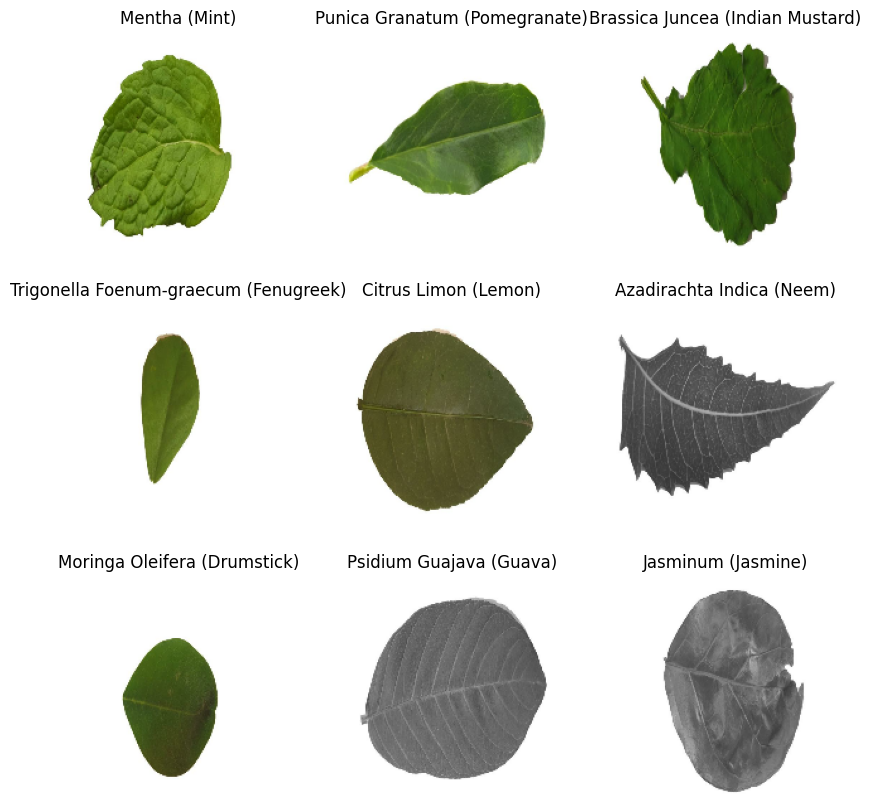

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
49/49 [==============================] - 219s 4s/step - loss: 2.6858 - accuracy: 0.3015 - val_loss: 1.3639 - val_accuracy: 0.5655
Epoch 2/25
49/49 [==============================] - 64s 1s/step - loss: 1.0123 - accuracy: 0.6947 - val_loss: 1.1546 - val_accuracy: 0.6310
Epoch 3/25
49/49 [==============================] - 63s 1s/step - loss: 0.5232 - accuracy: 0.8326 - val_loss: 1.0784 - val_accuracy: 0.7262
Epoch 4/25
49/49 [==============================] - 59s 1s/step - loss: 0.3314 - accuracy: 0.8987 - val_loss: 0.9874 - val_accuracy: 0.7381
Epoch 5/25
49/49 [==============================] - 57s 1s/step - loss: 0.1586 - accuracy: 0.9538 - val_loss: 0.8318 - val_accuracy: 0.7738
Epoch 6/25
49/49 [==============================] - 57s 1s/step - loss: 0.0930 - accuracy: 0.9724 - val_loss: 0.7800 - val_accuracy: 0.7917
Epoch 7/25
49/49 [==============================] - 69s 1s/step - loss: 0.0408 - accuracy: 0.9897 - val_loss: 1.0266 - val_accuracy: 0.7560
Epoch 8/25
49/49 [=

Text(0.5, 1.0, 'Loss')

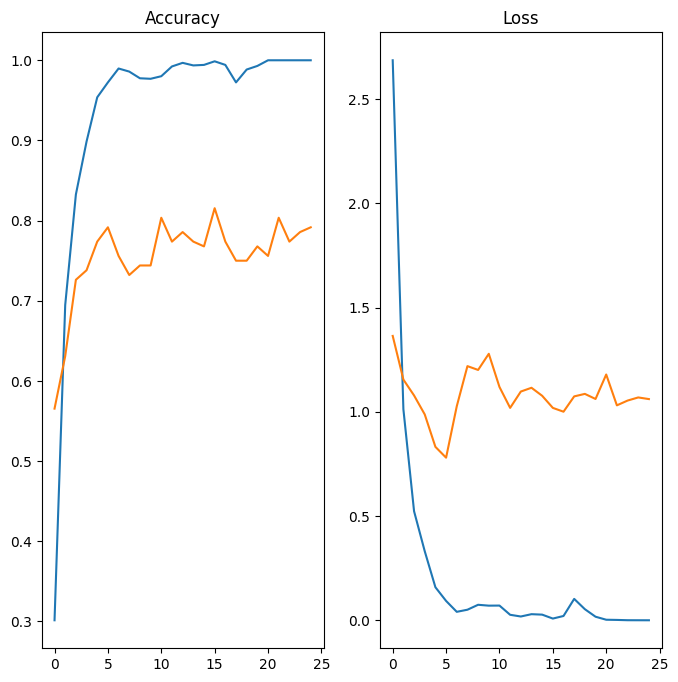

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
image = 'pic1.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 77ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('The leaf in the image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

The leaf in the image is Tabernaemontana Divaricata (Crape Jasmine) with accuracy of 92.69
